In [2]:
!pip install quandl
!pip install yfinance
!pip install investpy
!pip install pandas
!pip install matplotlib

In [3]:
import yfinance as yf
import investpy as ip
import pandas as pd
import quandl
import matplotlib.pyplot as plt
from functools import reduce

In [12]:
lista_ativos = ['VALE3.SA','TAEE11.SA','SLCE3.SA','CASH3.SA','CVBI11.SA','VRTA11.SA']

df = pd.DataFrame()

for stocks in lista_ativos:
    df[stocks] = yf.download(stocks,
                            start = '2021-09-13',
                            end = '2021-10-04')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
search_result = ip.search_quotes(text = 'bvsp',
                                products = ['indices'],
                                countries = ['brazil'],
                                n_results = 50)

for search_result in search_result[:1]:
    print(search_result)

{"id_": 17920, "name": "Bovespa", "symbol": "BVSP", "country": "brazil", "tag": "/indices/bovespa", "pair_type": "indices", "exchange": "BM&FBovespa"}


In [18]:
ibov = search_result.retrieve_historical_data(from_date = '13/09/2021',
                                                to_date = '04/10/2021')['Close']
ibov = pd.DataFrame(ibov).rename(columns = {'Close' : 'IBOV'})

In [31]:
ivvb11 = ip.get_etf_historical_data(etf = 'fundo de invest ishares sp 500',
                                    country = 'brazil',
                                    from_date = '13/09/2021',
                                    to_date = '04/10/2021')['Close']

ivvb11 = pd.DataFrame(ivvb11).rename(columns={'Close' : 'IVVB11'})

In [33]:
dfs = [df, ibov, ivvb11]
df_final = reduce(lambda left, right: pd.merge(left, right, on='Date'), dfs)

df_final.head()

,VALE3.SA,TAEE11.SA,SLCE3.SA,CASH3.SA,CVBI11.SA,VRTA11.SA,IBOV,IVVB11
Date,,,,,,,,
2021-09-13,85.842880,37.529999,44.360001,6.69,101.769997,107.889999,116404.0,252.85
2021-09-14,85.235924,38.029999,44.040001,7.70,101.500000,107.820000,116181.0,254.00
2021-09-15,83.107071,37.480000,44.119999,7.73,101.650002,108.800003,115063.0,255.65
2021-09-16,79.655602,37.340000,44.340000,7.37,101.800003,108.500000,113794.0,256.35
2021-09-17,78.043098,37.119999,43.889999,7.11,101.500000,108.300003,111439.0,254.52


In [34]:
normalizado = df_final/df_final.iloc[0]

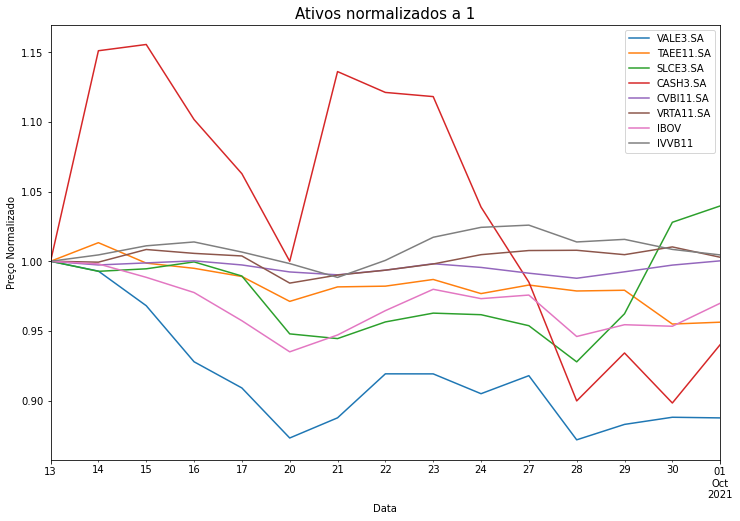

In [37]:
normalizado.plot(figsize = [12,8]);
plt.title('Ativos normalizados a 1', fontsize = 15)
plt.xlabel('Data')
plt.ylabel('Preço Normalizado')

plt.show()